# 6.3 Geospatial Analysis

### Content:

1. Import data and libraries

2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

#### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt
import folium
import json

In [2]:
#importing jason file
country_geo = r'/Users/tiaoshrieh/Downloads/us-states.json'

In [3]:
#opening json file in jupyter
f = open('/Users/tiaoshrieh/Downloads/us-states.json')
data = json.load(f)
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [4]:
df_accidents = pd.read_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/accidents_clean.pkl')

In [5]:
Population_df = pd.read_excel('/Users/tiaoshrieh/Downloads/US population.xlsx')

In [6]:
#merging population data to calculate accident rates
merged_df = df_accidents.merge(Population_df, on='State', how='left')

In [7]:
merged_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Year,Sum of POPESTIMATE2020,Sum of POPESTIMATE2021,Total Population
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,2016-02-08,2016,23581174,23560034,47141208
1,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,Day,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208
2,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,Day,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208
3,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,Day,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208
4,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,...,False,Day,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375694,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,Day,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148
2375695,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148
2375696,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,Day,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148
2375697,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148


In [11]:
#creating 'Accident Count' colomn
merged_df['Accident Count'] = merged_df.groupby('State')['State'].transform('count')

In [14]:
#creating 'Accident Rate' colomn
merged_df['Accident Rate'] = (merged_df['Accident Count'] / merged_df['Total Population']) * 100
merged_df['Accident Rate'] = merged_df['Accident Rate'].map('{:.2f}%'.format)


In [15]:
merged_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Year,Sum of POPESTIMATE2020,Sum of POPESTIMATE2021,Total Population,Accident Count,Accident Rate
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,2016-02-08,2016,23581174,23560034,47141208,15007,0.03%
1,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208,15007,0.03%
2,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208,15007,0.03%
3,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208,15007,0.03%
4,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,...,Day,Day,Day,2016-02-08,2016,23581174,23560034,47141208,15007,0.03%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375694,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148,664721,0.42%
2375695,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148,664721,0.42%
2375696,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148,664721,0.42%
2375697,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,Day,Day,Day,2019-08-23,2019,78999476,78475672,157475148,664721,0.42%


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Year,Accident Count
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,nan,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,2016,15007
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,nan,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016,15007
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,nan,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,2016,15007
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,nan,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016,15007
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,nan,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,WNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016,15007


#### 2.Data wrangling

In [18]:
#creating a new subset with necessary columns:

subset = merged_df[['Severity',
        'Distance(mi)',
        'State',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)',
        'Weather_Condition']]

#### 3.Data cleaning 

In [19]:
#checking missing values
merged_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                         0
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                 3345
Pressure(in)                1720
Visibility(mi)              7232
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)         150012
Weather_Condition              0
Amenity   

In [20]:
#imputing missing values
subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_11956/3090418467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)


In [21]:
subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_11956/1077046684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)


In [22]:
subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_11956/2724456775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)


In [23]:
subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_11956/447617672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)


In [24]:
subset.isnull().sum()

Severity             0
Distance(mi)         0
State                0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
dtype: int64

In [25]:
#checking duplicates
dups = subset.duplicated()

In [26]:
dups.shape

(2375699,)

<Axes: xlabel='Precipitation(in)', ylabel='Count'>

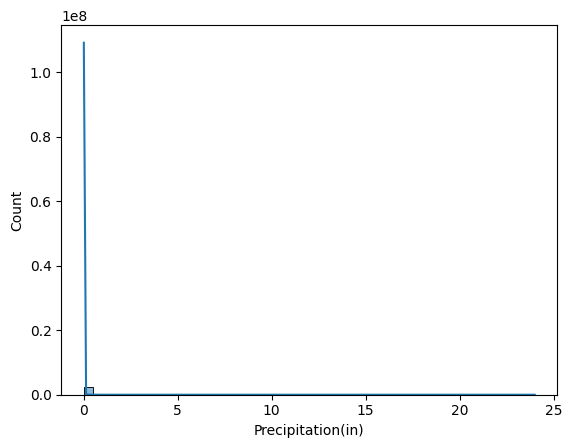

In [27]:
#checking for extreme values
sns.histplot(subset['Precipitation(in)'], bins = 50, kde = True)

In [31]:
#cleaning extreme values
subset = subset[subset['Precipitation(in)'] <= 2]

<Axes: xlabel='Precipitation(in)', ylabel='Count'>

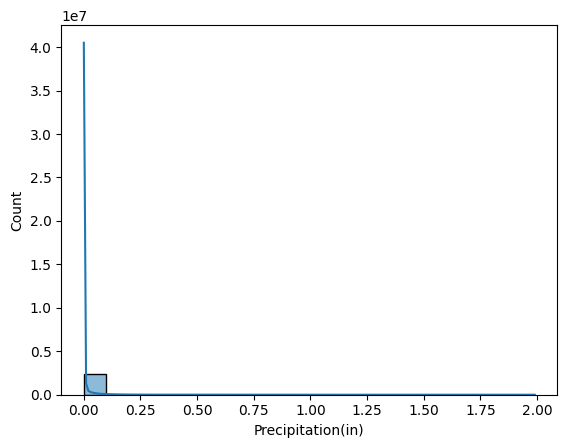

In [32]:
sns.histplot(subset['Precipitation(in)'], bins = 20, kde = True)

<Axes: xlabel='Visibility(mi)', ylabel='Count'>

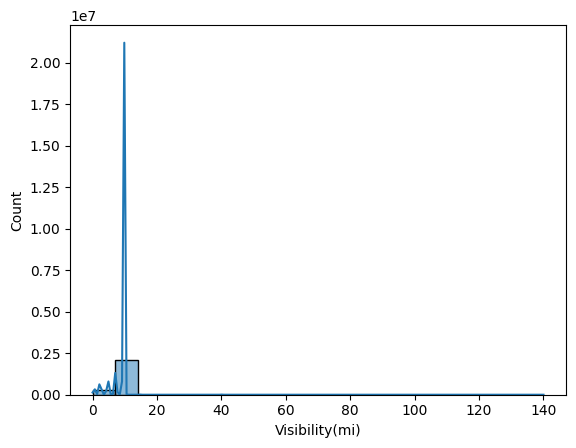

In [33]:
sns.histplot(subset['Visibility(mi)'], bins = 20, kde = True)

In [35]:
subset = subset[subset['Visibility(mi)'] <= 8]

<Axes: xlabel='Humidity(%)', ylabel='Count'>

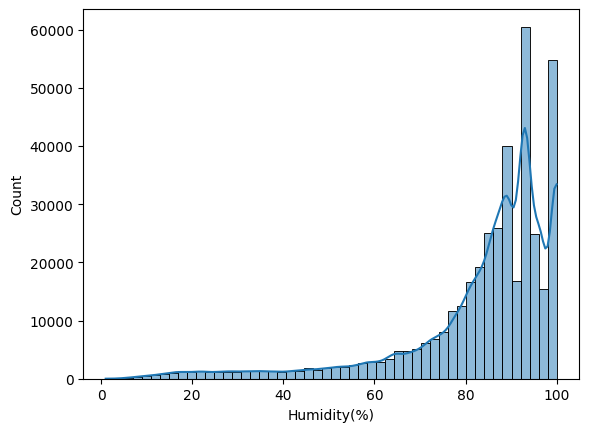

In [36]:
sns.histplot(subset['Humidity(%)'], bins = 50, kde = True)

#### 4. Plotting a choropleth

In [37]:
#creating a choropleth map to see which state has the highest number of accidents
df_count = subset.groupby('State')['State'].count().reset_index(name = 'Count')

accidents_map = folium.Map(location = [100, 0], zoom_start = 3)

folium.Choropleth(
    geo_data = country_geo, 
    data = df_count,
    name = 'Accidents by State',
    columns = ['State', 'Count'],
    key_on = 'feature.id',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accident Count',
   
    
).add_to(accidents_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    country_geo,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields= ['name'],
        aliases=['State: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
accidents_map.add_child(NIL)
accidents_map.keep_in_front(NIL)

folium.LayerControl().add_to(accidents_map)
    
accidents_map    
    

California, Florida, and Texas have the highest number of accidents respectively.

In [38]:
#creating a choropleth map to see which states see higher humidity

humidity_map = folium.Map(location = [100, 0], zoom_start = 3)

folium.Choropleth(
    geo_data = country_geo, 
    data = subset,
    name = 'Humidity by State',
    columns = ['State', 'Humidity(%)'],
    key_on = 'feature.id',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Humidity(percentage)',
   
    
).add_to(humidity_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    country_geo,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields= ['name'],
        aliases=['State: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
humidity_map.add_child(NIL)
humidity_map.keep_in_front(NIL)

folium.LayerControl().add_to(humidity_map)
    
humidity_map    
    

In [39]:
#creating a choropleth map to see which states see higher precipitation

precipitation_map = folium.Map(location = [100, 0], zoom_start = 3)

folium.Choropleth(
    geo_data = country_geo, 
    data = subset,
    name = 'Humidity by State',
    columns = ['State', 'Precipitation(in)'],
    key_on = 'feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precipitation(inches)',
   
    
).add_to(precipitation_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    country_geo,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields= ['name'],
        aliases=['State: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
precipitation_map.add_child(NIL)
precipitation_map.keep_in_front(NIL)

folium.LayerControl().add_to(precipitation_map)
    
precipitation_map    


In [40]:
#trying with a new and smaller subset for precipitation to compare states on a smaller scale

sub2 = subset[['Precipitation(in)', 'State']]

In [41]:
sub2 = sub2[sub2['Precipitation(in)'] <=0.3]

In [42]:
precipitation_map2 = folium.Map(location = [100, 0], zoom_start = 3)

folium.Choropleth(
    geo_data = country_geo, 
    data = sub2,
    name = 'Humidity by State',
    columns = ['State', 'Precipitation(in)'],
    key_on = 'feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precipitation(inches)',
   
    
).add_to(precipitation_map2)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    country_geo,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields= ['name'],
        aliases=['State: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
precipitation_map2.add_child(NIL)
precipitation_map2.keep_in_front(NIL)

folium.LayerControl().add_to(precipitation_map2)
    
precipitation_map2    


In [43]:
#trying with a new and smaller subset for precipitation to compare states on a smaller scale

sub3 = subset[['Precipitation(in)', 'State']]

In [44]:
sub3 = sub3[sub3['Precipitation(in)'] <=0.1]

In [45]:
precipitation_map3 = folium.Map(location = [100, 0], zoom_start = 3)

folium.Choropleth(
    geo_data = country_geo, 
    data = sub3,
    name = 'Humidity by State',
    columns = ['State', 'Precipitation(in)'],
    key_on = 'feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precipitation(inches)',
   
    
).add_to(precipitation_map3)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    country_geo,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields= ['name'],
        aliases=['State: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
precipitation_map3.add_child(NIL)
precipitation_map3.keep_in_front(NIL)

folium.LayerControl().add_to(precipitation_map3)
    
precipitation_map3    

The maps don't show any strong relationship between the number of accidents in a state and the degree of humidity or precipitation.

Also, by looking at the maps, a state with higher humidity does not necessarily experience higher amount of precipitation.

In [46]:
#exporting maps in html files
accidents_map.save('accidents.html')

In [47]:
humidity_map.save('humidity.html')

In [48]:
precipitation_map.save('precipitation.html')

In [49]:
precipitation_map2.save('precipitation2.html')

In [50]:
precipitation_map3.save('precipitation.html3')

In [53]:
#removing unnecessary colomns to reduce the size of the dataset being exported
columns_to_delete = ['Sum of POPESTIMATE2020', 'Sum of POPESTIMATE2021']
merged_df = merged_df.drop(columns=columns_to_delete)

In [55]:
sub4 = merged_df[['Severity',
        'Distance(mi)',
        'State',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)',
        'Weather_Condition',
        'Total Population', 'Accident Count', 'Accident Rate']]

In [56]:
#Exporting merged dataset
sub4.to_csv('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/accidents-population.csv')